Loading and preprocessing data...
Found 900 files belonging to 6 classes.
Using 720 files for training.
Found 900 files belonging to 6 classes.
Using 180 files for validation.
Number of classes: 6
Class names: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']
Creating CNN model...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Starting training...
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.2544 - loss: 2.0643 - val_accuracy: 0.3889 - val_loss: 1.3904
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.3499 - loss: 1.5828 - val_accuracy: 0.3778 - val_loss: 1.5020
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.3977 - loss: 1.4656 - val_accuracy: 0.4056 - val_loss: 1.5602
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 107s 5s/step - accuracy: 0.4423 - loss: 1.3947 - val_accuracy: 0.4500 - val_loss: 1.4019
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.4840 - loss: 1.3250 - val_accuracy: 0.4889 - val_loss: 1.2806
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.5266 - loss: 1.2111 - val_accuracy: 0.5222 - val_loss: 1.1771
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - accuracy: 0.5899 - loss: 1.0884 - val_accuracy: 0.5889 - val_loss: 1.1346
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 93s 4s/step - accuracy: 0.5723 - loss: 1.0400 - val_acc

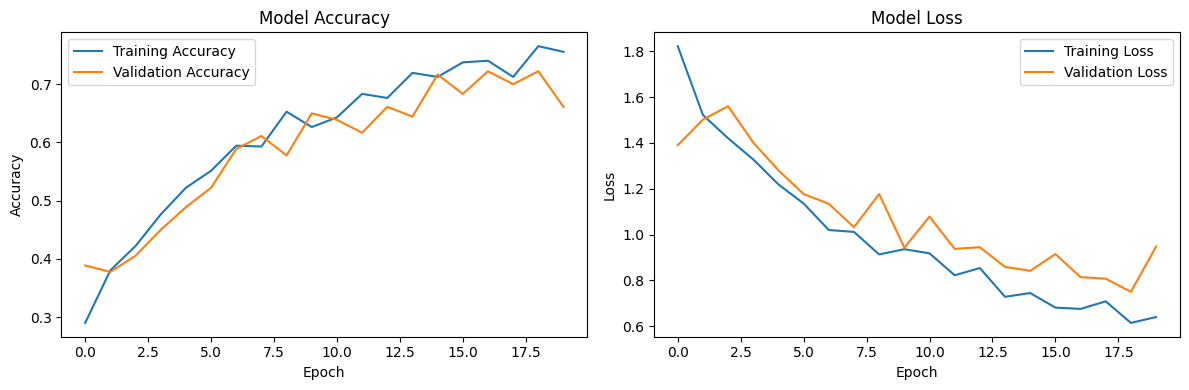

In [2]:
import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from keras.optimizers import Adam
from keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt

# Dataset path
dataset_path = r"/content/drive/MyDrive/concave"

# Model parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

def create_data_augmentation():
    """
    Create data augmentation layers
    """
    data_augmentation = Sequential([
        RandomFlip("horizontal"),
        RandomRotation(0.1),
        RandomZoom(0.2),
    ])
    return data_augmentation

def create_simple_cnn(num_classes):
    """
    Create a simple CNN model for image classification
    """
    data_augmentation = create_data_augmentation()

    model = Sequential([
        # Define input shape explicitly to avoid warning
        InputLayer(input_shape=input_shape),

        # Data augmentation layers
        data_augmentation,

        # Rescaling layer (normalize pixel values)
        Rescaling(1./255),

        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Flatten and Dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    return model

def load_and_preprocess_data(dataset_path):
    """
    Load and preprocess the dataset using image_dataset_from_directory
    """
    # Load training data
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size
    )

    # Load validation data
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=(224, 224),
        batch_size=batch_size
    )

    # Store class names before applying transformations
    class_names = train_ds.class_names

    # Optimize performance
    AUTOTUNE = tf.data.AUTOTUNE
    train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
    val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

    return train_ds, val_ds, class_names

def train_model():
    """
    Main training function
    """
    # Check if dataset path exists
    if not os.path.exists(dataset_path):
        print(f"Error: Dataset path '{dataset_path}' does not exist!")
        return

    # Load data
    print("Loading and preprocessing data...")
    train_ds, val_ds, class_names = load_and_preprocess_data(dataset_path)

    # Get number of classes
    num_classes = len(class_names)
    print(f"Number of classes: {num_classes}")
    print(f"Class names: {class_names}")

    # Create model
    print("Creating CNN model...")
    model = create_simple_cnn(num_classes)

    # Build the model by calling it once (to show proper summary)
    model.build((None, 224, 224, 3))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Display model summary (now with proper parameter counts)
    model.summary()

    # Train model
    print("Starting training...")
    history = model.fit(
        train_ds,
        epochs=epochs,
        validation_data=val_ds,
        verbose=1
    )

    # Save model
    model.save('simple_cnn_model.keras')
    print("Model saved as 'simple_cnn_model.keras'")

    # Plot training history
    plot_training_history(history)

    return model, history, class_names

def plot_training_history(history):
    """
    Plot training and validation accuracy and loss
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

def make_prediction(model, image_path, class_names):
    """
    Make prediction on a single image
    """
    # Load and preprocess image
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    confidence = tf.nn.softmax(predictions[0])

    print(f"Predicted class: {class_names[predicted_class]}")
    print(f"Confidence: {100 * np.max(confidence):.2f}%")

    return predicted_class, np.max(confidence)

if __name__ == "__main__":
    # Train the model
    model, history, class_names = train_model()

    # Example of making a prediction (uncomment to use)
    # predicted_class, confidence = make_prediction(model, "path/to/your/test/image.jpg", class_names)
